In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# defining file path

path  = r'C:\Users\Layzr\Desktop\School\Data Immersion Part 6\Achievement 6'

In [3]:
# importing dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_dataset.csv'))

In [5]:
# dropping unneeded column

df = df.drop('Unnamed: 0', axis=1)

In [6]:
df.head()

,year,player,age,team,lg,war,g,pa,ab,r,...,rbat+,tb,gidp,hbp,sh,sf,ibb,pos,awards,player-additional
0,2023,Marcus Semien,32,TEX,AL,7.7,162,753,670,122,...,131,320,5,5,0,5,1,*4,ASMVP-3SS,semiema01
1,2023,Ronald Acuña Jr.,25,ATL,NL,8.4,159,735,643,149,...,175,383,15,9,0,3,3,*9/D,ASMVP-1SS,acunaro01
2,2024,Jarren Duran*,27,BOS,AL,8.7,160,735,671,111,...,134,330,6,6,1,3,1,*87,ASMVP-8,duranja01
3,2024,Shohei Ohtani*,29,LAD,NL,9.2,159,731,636,134,...,190,411,7,6,0,5,10,*D,ASMVP-1SS,ohtansh01
4,2023,Freddie Freeman*,33,LAD,NL,6.8,161,730,637,131,...,167,361,14,16,0,5,12,*3,ASMVP-3,freemfr01


In [7]:
df.columns

Index(['year', 'player', 'age', 'team', 'lg', 'war', 'g', 'pa', 'ab', 'r', 'h',
       '2b', '3b', 'hr', 'rbi', 'sb', 'cs', 'bb', 'so', 'ba', 'obp', 'slg',
       'ops', 'ops+', 'roba', 'rbat+', 'tb', 'gidp', 'hbp', 'sh', 'sf', 'ibb',
       'pos', 'awards', 'player-additional'],
      dtype='object')

In [11]:
# creating a filtered data frame of only players who had atleast 50 plate appearances so the small samples don't skew the results

filtered_df = df[df['pa'] > 50]

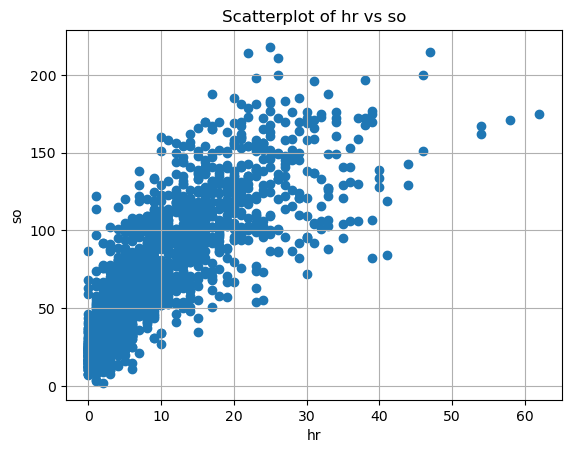

In [13]:
plt.scatter(filtered_df['hr'], filtered_df['so'])
plt.xlabel('hr')
plt.ylabel('so')
plt.title('Scatterplot of hr vs so')
plt.grid(True)
plt.show()

## The more home runs you hit the more strikeouts you will have due to the plate approach it takes to hit a lot of home runs

In [14]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = filtered_df['hr'].values.reshape(-1,1)
y = filtered_df['so'].values.reshape(-1,1)

In [16]:
X

array([[29],
       [41],
       [21],
       ...,
       [ 5],
       [ 0],
       [ 2]], dtype=int64)

In [17]:
y

array([[110],
       [ 84],
       [160],
       ...,
       [ 16],
       [  7],
       [ 13]], dtype=int64)

In [18]:
# spliting the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# creating a regression object

regression = LinearRegression()

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

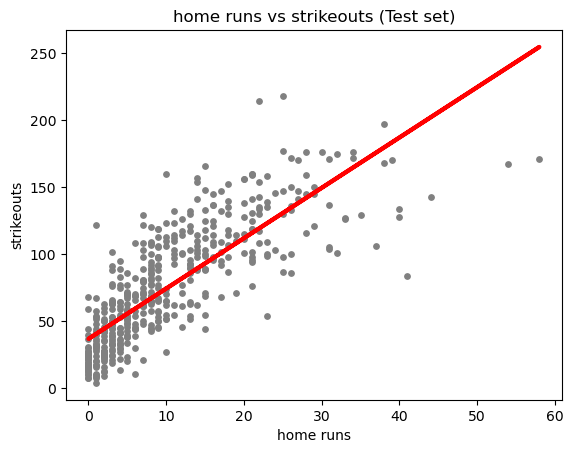

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('home runs vs strikeouts (Test set)')
plot_test.xlabel('home runs')
plot_test.ylabel('strikeouts')
plot_test.show()

The line fits the data decently to start but as it gets higher it really doesn't fit at all so overall i'd say not a great fit

In [24]:
# creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.75398943]]
Mean squared error:  696.3600082539283
R2 score:  0.6407801499528606


In [27]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,35,44.355574
1,89,63.125521
2,32,51.863553
3,24,36.847595
4,98,89.403447
5,44,48.109564
6,72,55.617542
7,30,36.847595
8,69,59.371532
9,65,74.387490


### The model performed quite poorly for this test it also showed that while there is some connection between home runs and strikeouts its not the strongest connection and with it's massive MSE score of 696 I can conclude a regression test was not the best fit for this data.

### The main bias in this data is that to hit a lot of home runs you have to play a lot and if you play a lot you are going to strikeout more.